## Access Satellite Chlorophylla Carder 1Day Aqua data in Zarr
A jupyter notebook to show how to access and plot the AODN satellite_chlorophylla_carder_1day_aqua dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/43ac4663-c8de-4eb0-9711-3da65cbecdd3).

In [1]:
dataset_name = "satellite_chlorophylla_carder_1day_aqua"

In [2]:
import xarray as xr
import fsspec

## Install/Update packages and Load common functions

In [3]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 240 packages in 31ms


✅ Local version 0.2.1 is up to date (remote: 0.2.1)


In [4]:
from DataQuery import GetAodn

In [5]:
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 521 ms, sys: 49.2 ms, total: 570 ms
Wall time: 1.16 s


## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2002-07-04 05:30:00'), Timestamp('2022-08-13 05:30:00'))

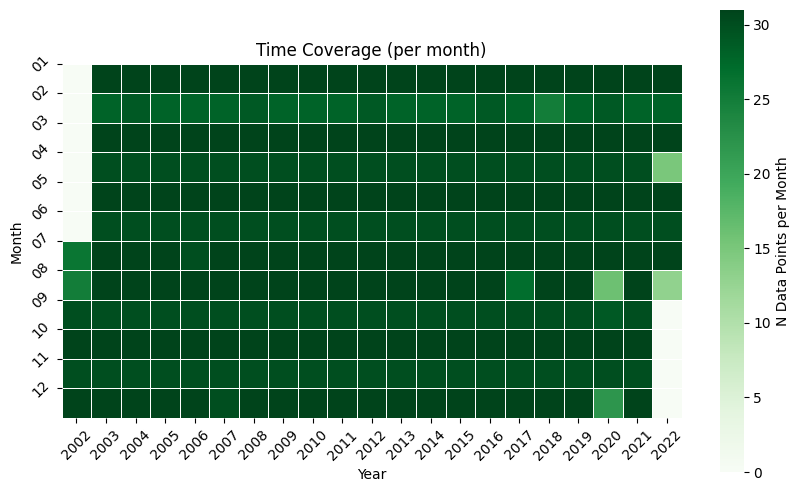

In [7]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

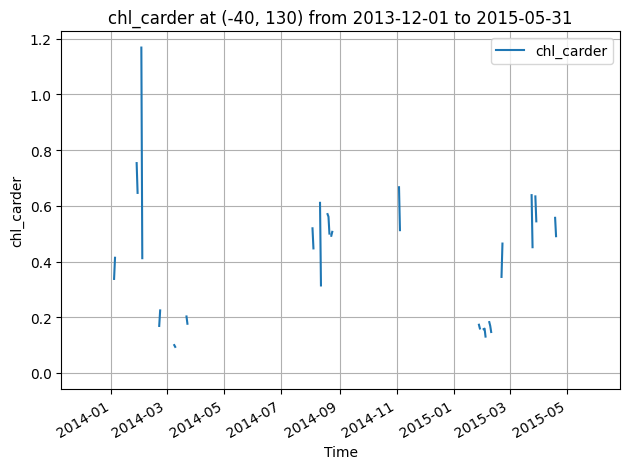

CPU times: user 2.14 s, sys: 425 ms, total: 2.57 s
Wall time: 7.61 s


In [8]:
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='chl_carder', 
                                                  lat=-40, 
                                                  lon=130, 
                                                  date_start='2013-12-01', 
                                                  date_end='2015-05-31', 
                                                  lon_name_override="longitude", 
                                                  lat_name_override="latitude").plot_timeseries()

## Plot a gridded variable

2025-06-11 16:12:20,548 - aodn.GetAodn - INFO - Plotting 'Chlorophyll Concentration, Carder model' for 9 time steps.
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2510: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(


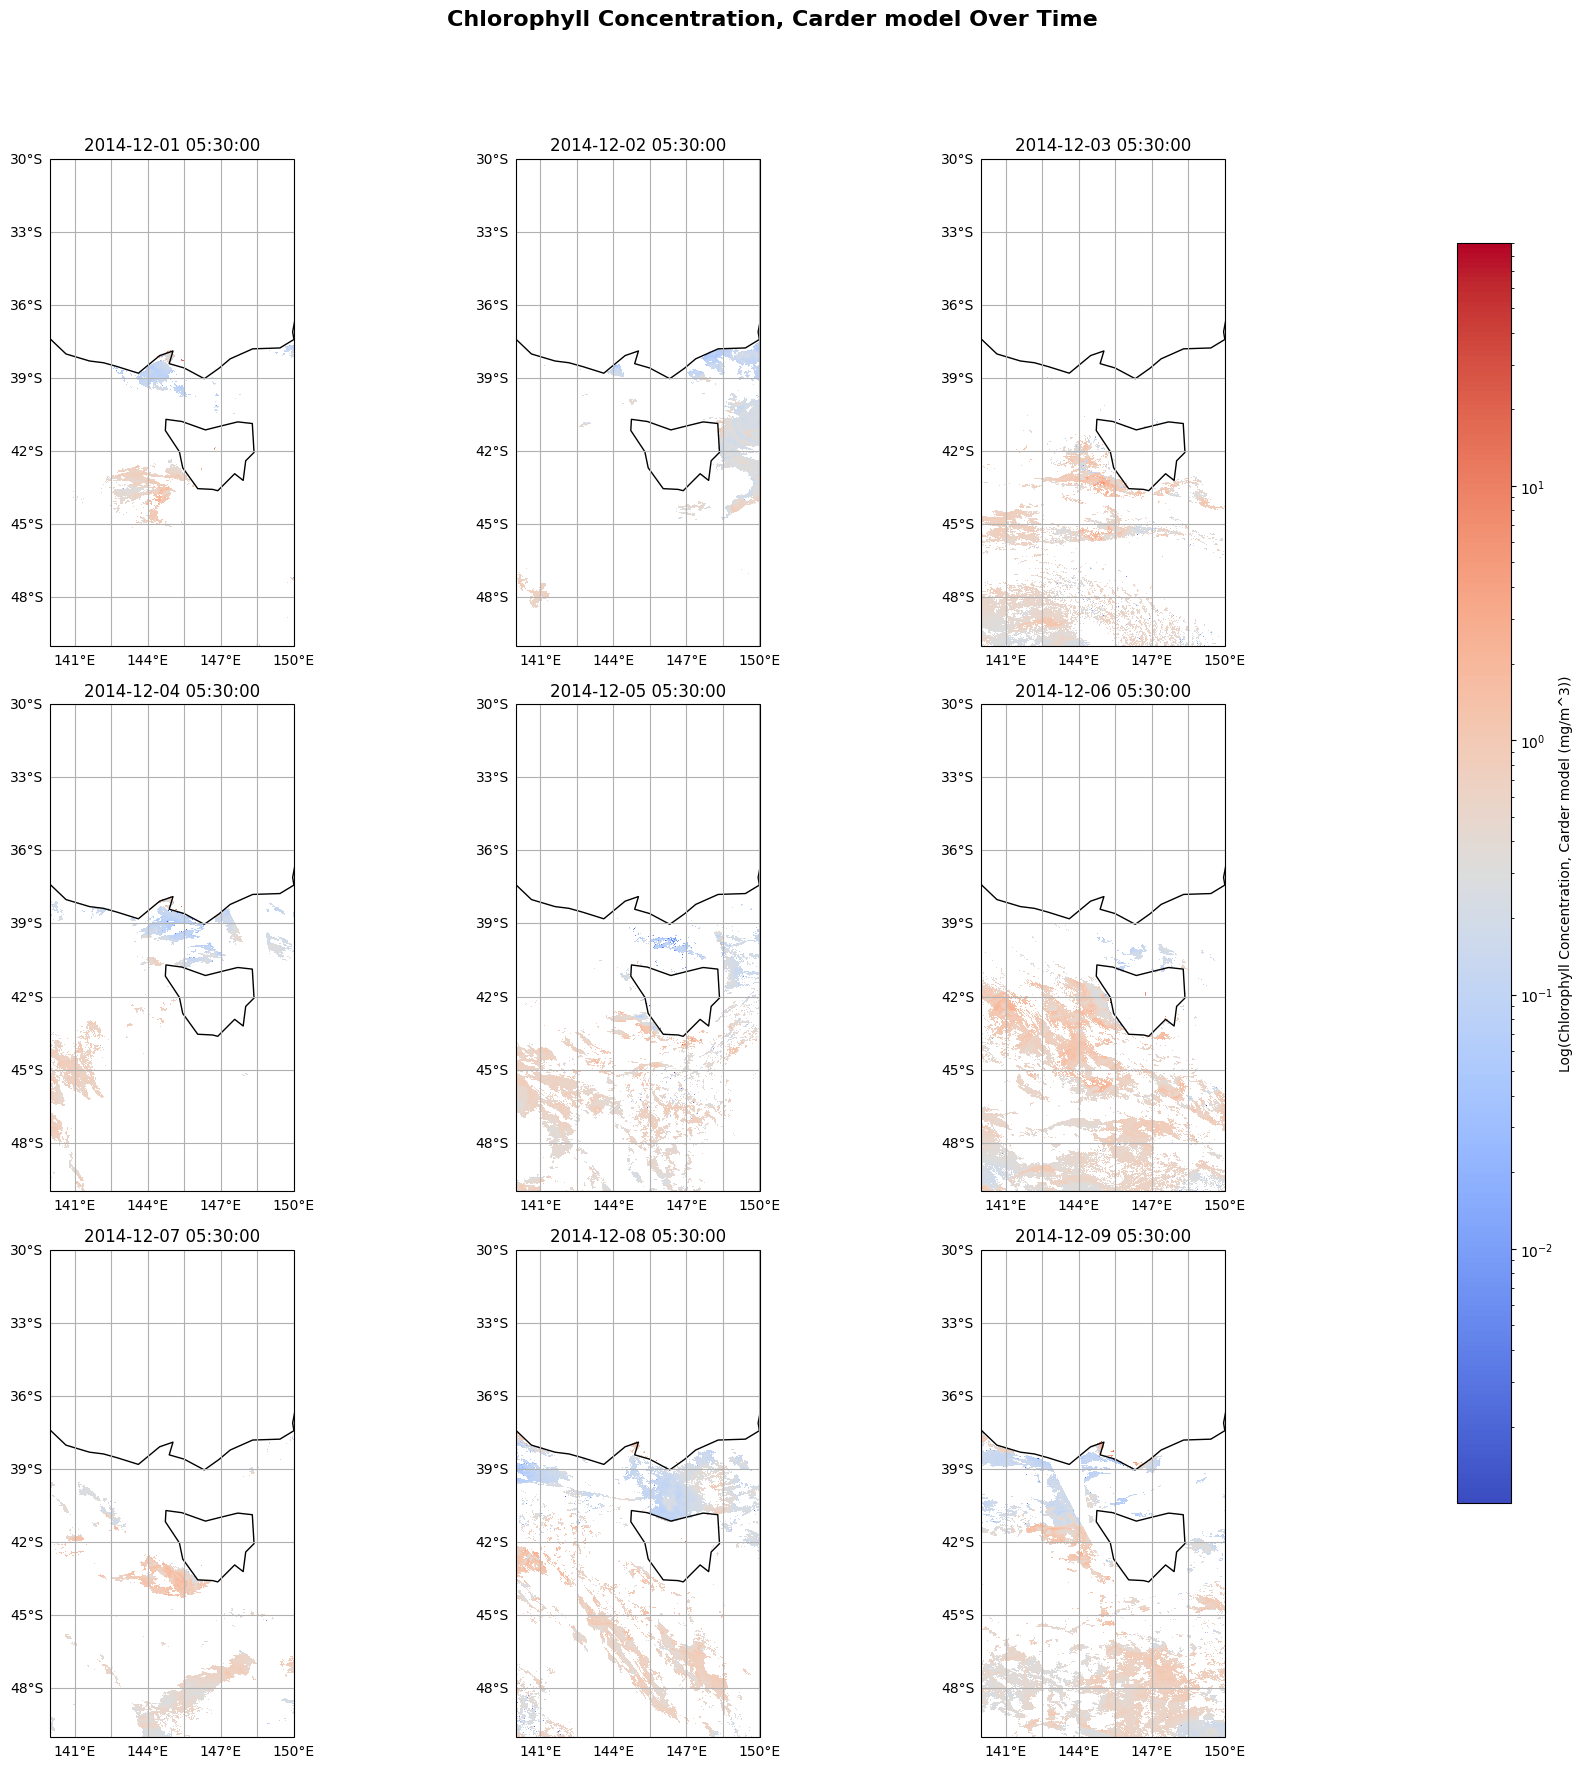

CPU times: user 11.5 s, sys: 5.36 s, total: 16.9 s
Wall time: 17.4 s


In [9]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='chl_carder', 
                                                    date_start='2014-12-01', 
                                                    date_end='2015-05-31', 
                                                    lon_name_override="longitude", 
                                                    lat_name_override="latitude", 
                                                    lon_slice=(140, 150), 
                                                    lat_slice=(-50, -30), 
                                                    n_days=9, 
                                                    coastline_resolution="110m", 
                                                    log_scale=True)